In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

df = pd.read_csv('./final_df_dates.csv')

In [32]:
df_info = {
    "head": df.head(),
    "info": df.info(),
    "summary": df.describe(include='all')
}

display(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        164 non-null    object 
 1   Adj Close                   164 non-null    float64
 2   High                        164 non-null    float64
 3   Low                         164 non-null    float64
 4   Open                        164 non-null    float64
 5   aggregate_sentiment_mean    164 non-null    float64
 6   aggregate_sentiment_median  164 non-null    float64
 7   aggregate_sentiment_std     164 non-null    float64
 8   Target                      164 non-null    float64
 9   TargetClass                 164 non-null    int64  
 10  TargetNextClose             164 non-null    float64
 11  Date.1                      164 non-null    object 
dtypes: float64(9), int64(1), object(2)
memory usage: 15.5+ KB


,Date,Adj Close,High,Low,Open,aggregate_sentiment_mean,aggregate_sentiment_median,aggregate_sentiment_std,Target,TargetClass,TargetNextClose,Date.1
0,2024-04-08,439.283508,442.500000,439.200012,441.410004,0.056476,0.162014,0.108029,-2.051361,0,440.908630,2024-04-08
1,2024-04-09,440.908630,443.239990,437.440002,442.959991,0.056175,0.143970,0.139817,0.060181,1,437.060181,2024-04-09
2,2024-04-10,437.060181,439.239990,436.279999,437.000000,0.037851,0.162568,0.107070,3.779236,1,444.039246,2024-04-10
3,2024-04-11,444.039246,446.329987,437.959991,440.260010,0.030058,0.121310,0.125926,-4.139557,0,436.960449,2024-04-11
4,2024-04-12,436.960449,442.239990,436.880005,441.100006,0.049813,0.162524,0.070360,-12.287994,0,429.772003,2024-04-12
...,...,...,...,...,...,...,...,...,...,...,...,...
159,2024-11-21,504.980011,506.959991,497.559998,506.239990,0.024213,0.252711,0.045005,1.369995,1,505.790009,2024-11-21
160,2024-11-22,505.790009,506.529999,502.779999,504.420013,0.030498,0.216116,0.067776,-3.309998,0,506.589996,2024-11-22
161,2024-11-25,506.589996,511.450012,504.260010,509.899994,0.024244,0.189632,0.075995,1.230011,1,509.309998,2024-11-25
162,2024-11-26,509.309998,510.140015,507.230011,508.079987,0.020275,0.199097,0.051267,-2.870026,0,505.299988,2024-11-26


<Figure size 1000x600 with 0 Axes>

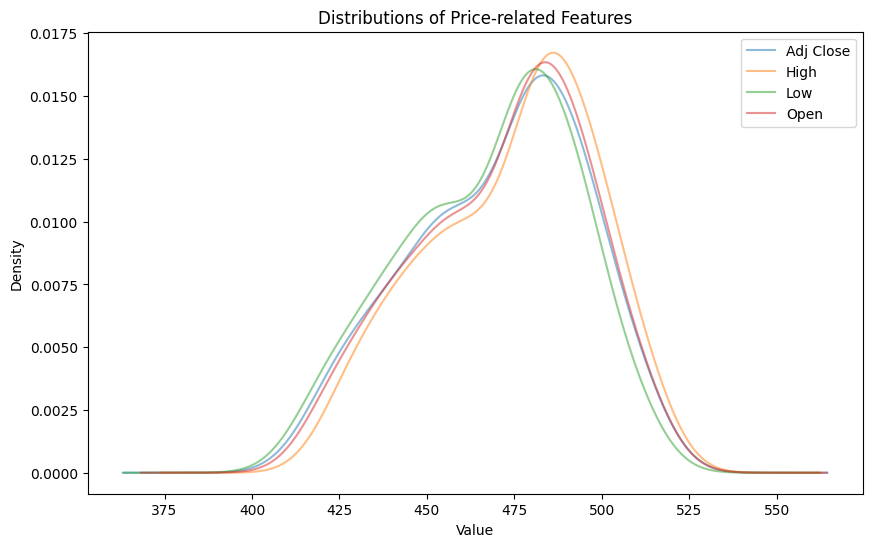

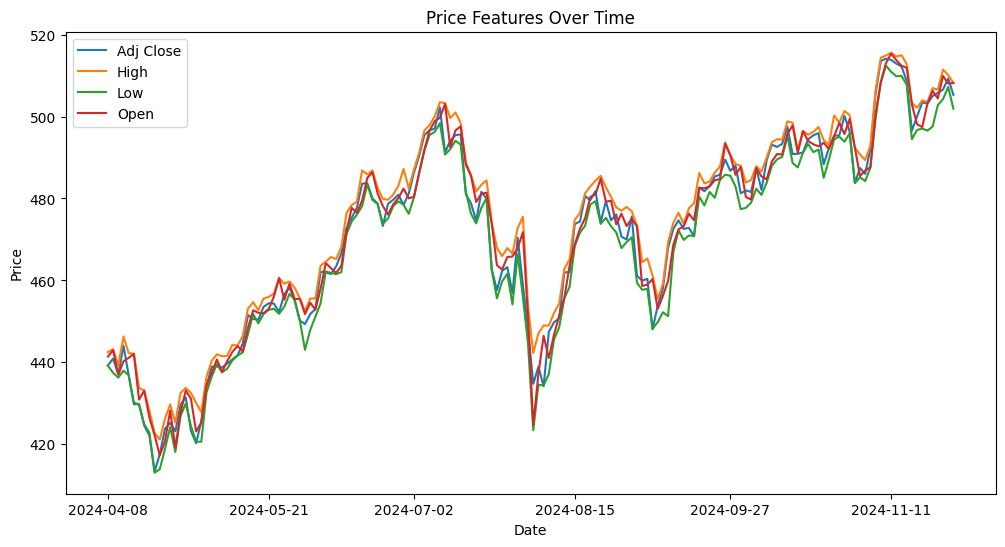

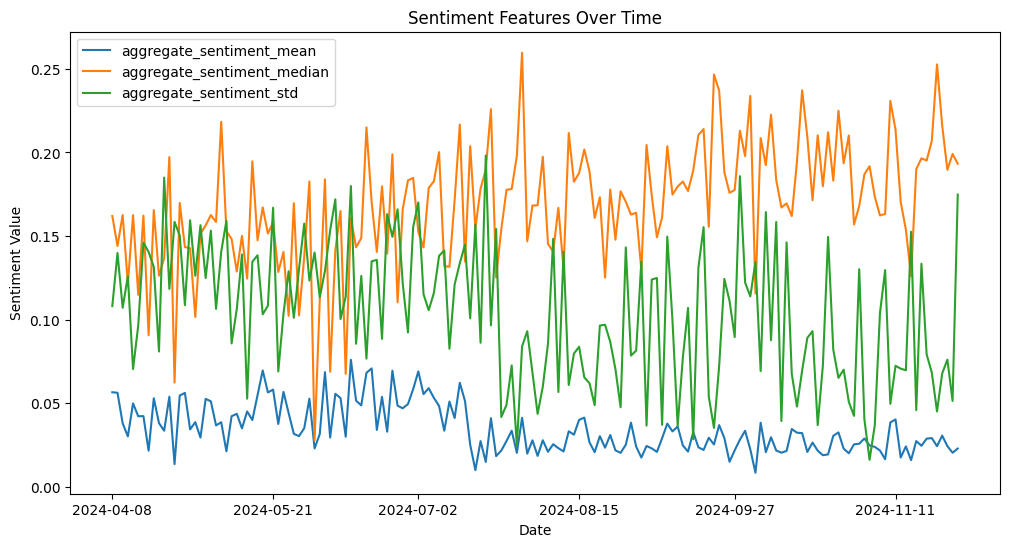

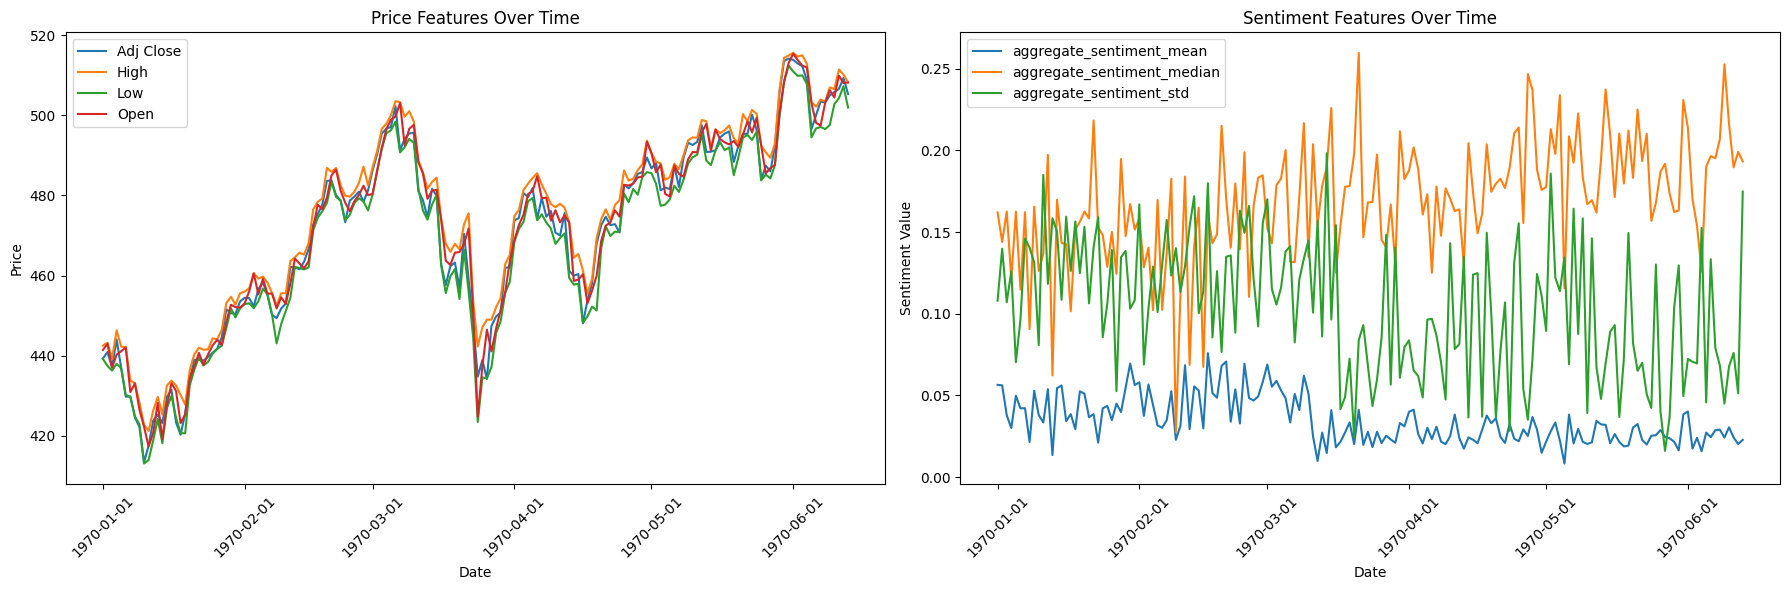

In [58]:
plt.figure(figsize=(10, 6))
df[["Adj Close", "High", "Low", "Open"]].plot(kind='density', alpha=0.5, figsize=(10, 6))
plt.title("Distributions of Price-related Features")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend(["Adj Close", "High", "Low", "Open"])
plt.show()

# 1. Plot Prices over time
plt.figure(figsize=(12, 6))
for col in price_columns:
    plt.plot(df["Date"], df[col], label=col)

plt.title("Price Features Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.legend()
plt.show()

# 2. Plot Sentiment features over time
plt.figure(figsize=(12, 6))
for col in sentiment_columns:
    plt.plot(df["Date"], df[col], label=col)

plt.title("Sentiment Features Over Time")
plt.xlabel("Date")
plt.ylabel("Sentiment Value")
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.legend()
plt.show()

# Side-by-side plots for Price and Sentiment Features Over Time
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=False)

# Price features over time
for col in ["Adj Close", "High", "Low", "Open"]:
    axes[0].plot(df["Date"], df[col], label=col)
axes[0].set_title("Price Features Over Time")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Price")
axes[0].legend()
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
axes[0].xaxis.set_major_locator(mdates.AutoDateLocator())
axes[0].tick_params(axis='x', rotation=45)

# Sentiment features over time
for col in ["aggregate_sentiment_mean", "aggregate_sentiment_median", "aggregate_sentiment_std"]:
    axes[1].plot(df["Date"], df[col], label=col)
axes[1].set_title("Sentiment Features Over Time")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Sentiment Value")
axes[1].legend()
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
axes[1].xaxis.set_major_locator(mdates.AutoDateLocator())
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


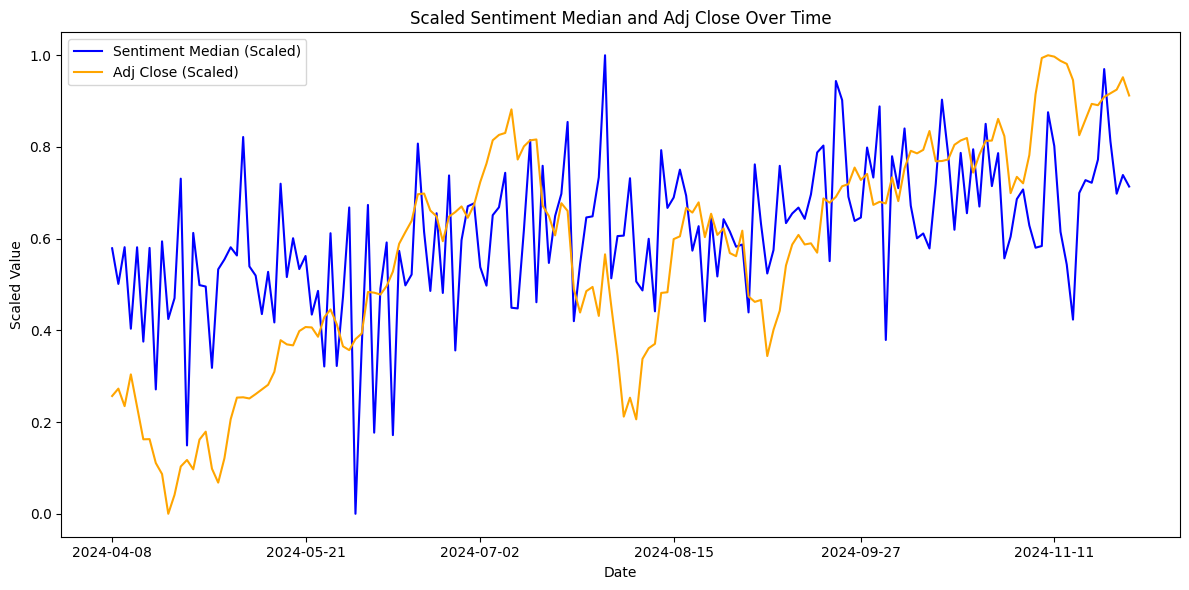

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Scale both Sentiment Mean and Adj Close to the same range for correlation visualization
scaled_data = scaler.fit_transform(df[["aggregate_sentiment_median", "Adj Close"]])
df["Sentiment Median Scaled"] = scaled_data[:, 0]
df["Adj Close Scaled"] = scaled_data[:, 1]

# Plot scaled Sentiment Mean and Adj Close
plt.figure(figsize=(12, 6))

# Plot scaled Sentiment Mean
plt.plot(df["Date"], df["Sentiment Median Scaled"], label="Sentiment Median (Scaled)", color='blue')

# Plot scaled Adj Close
plt.plot(df["Date"], df["Adj Close Scaled"], label="Adj Close (Scaled)", color='orange')

plt.title("Scaled Sentiment Median and Adj Close Over Time")
plt.xlabel("Date")
plt.ylabel("Scaled Value")
plt.legend()

# Format the x-axis for better readability
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


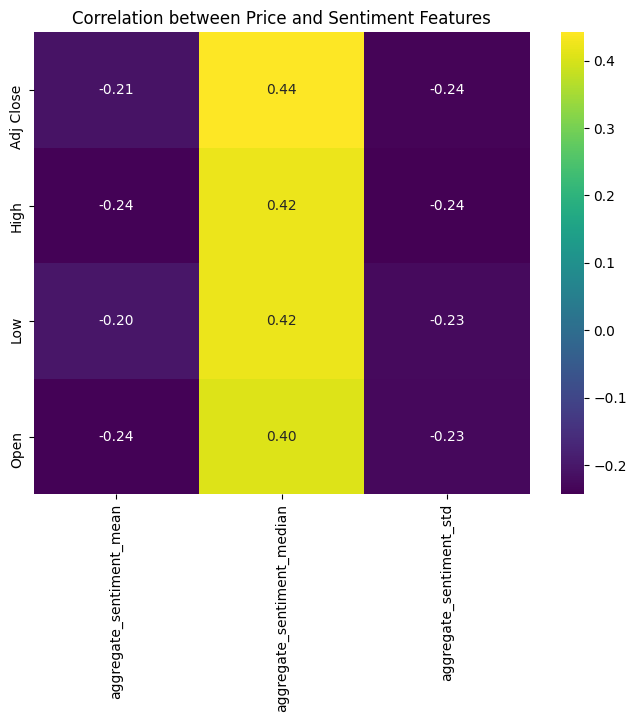

In [34]:
# Redefine correlation matrices

price_columns = ["Adj Close", "High", "Low", "Open"]
sentiment_columns = ["aggregate_sentiment_mean","aggregate_sentiment_median","aggregate_sentiment_std"]

correlation_price_sentiment = df[price_columns + sentiment_columns].corr()
target_sentiment_corr = df[["Target"] + sentiment_columns].corr()

# 2. Plot the correlation chart of price and sentiment
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_price_sentiment.loc[price_columns, sentiment_columns], annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation between Price and Sentiment Features")
plt.show()

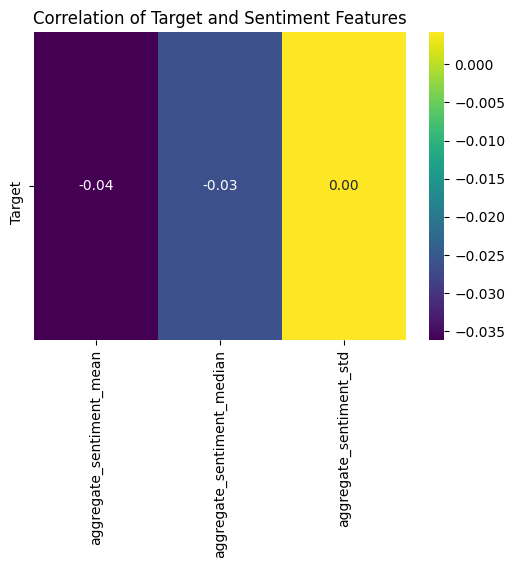

In [61]:
plt.figure(figsize=(6, 4))
sns.heatmap(target_sentiment_corr.loc[["Target"], sentiment_columns], annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation of Target and Sentiment Features")
plt.show()

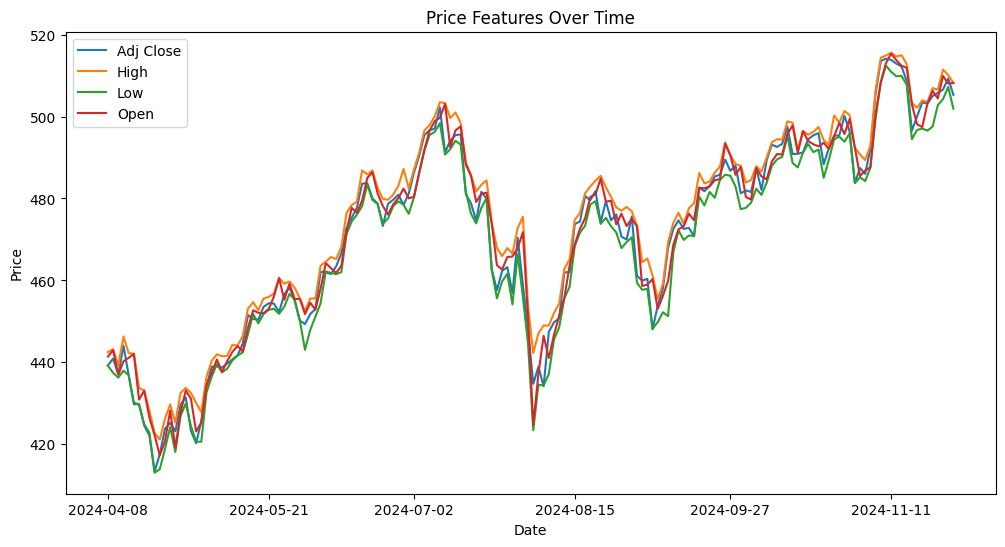

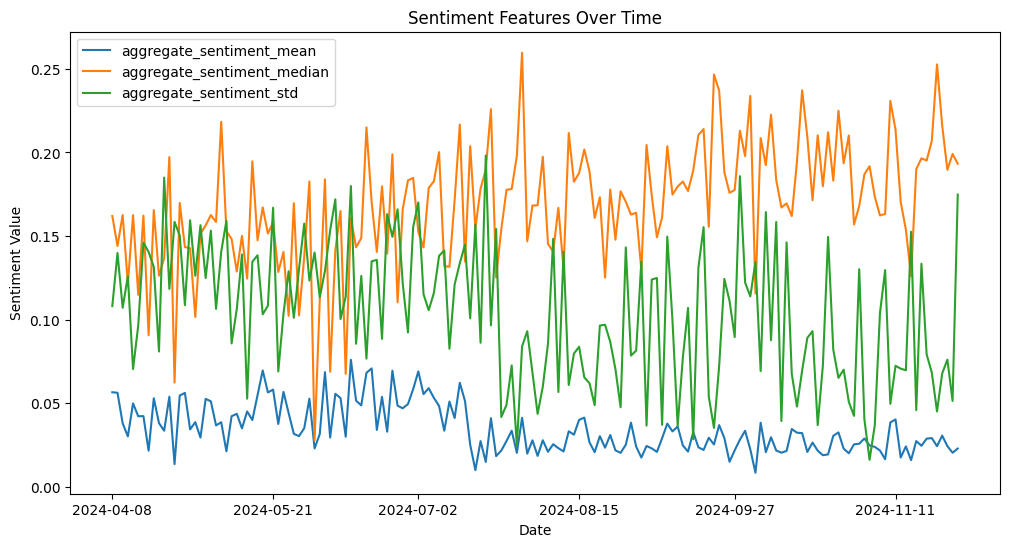

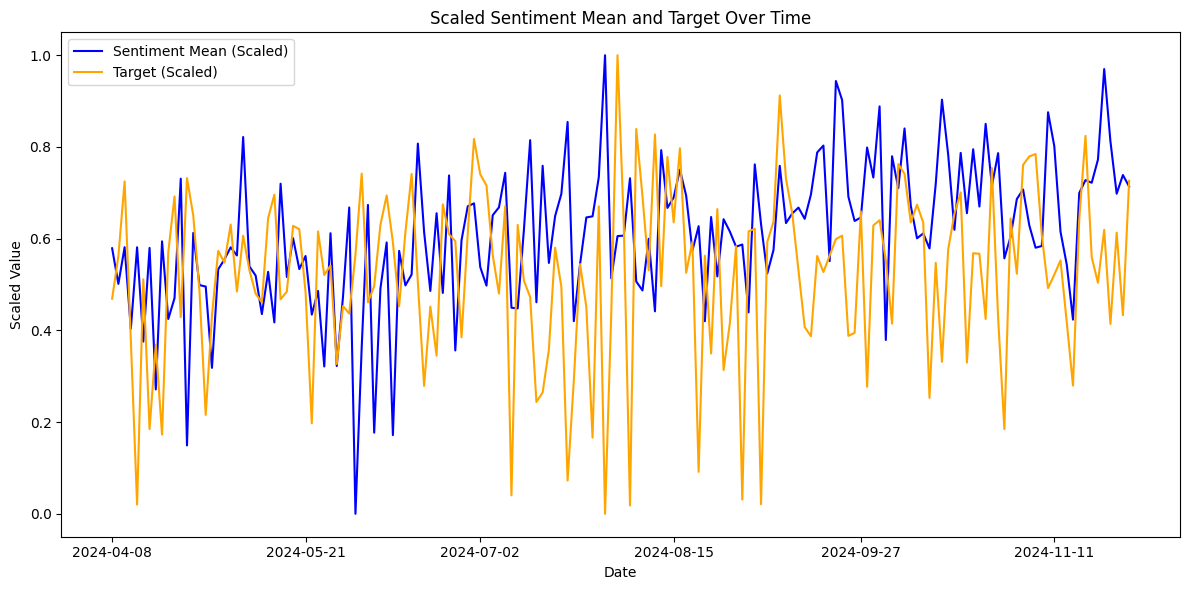

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Scale both Sentiment Mean and Adj Close to the same range for correlation visualization
scaled_data = scaler.fit_transform(df[["aggregate_sentiment_median", "Target"]])
df["Sentiment Mean Scaled"] = scaled_data[:, 0]
df["Target Scaled"] = scaled_data[:, 1]

# Plot scaled Sentiment Mean and Adj Close
plt.figure(figsize=(12, 6))

# Plot scaled Sentiment Mean
plt.plot(df["Date"], df["Sentiment Mean Scaled"], label="Sentiment Mean (Scaled)", color='blue')

# Plot scaled Adj Close
plt.plot(df["Date"], df["Target Scaled"], label="Target (Scaled)", color='orange')

plt.title("Scaled Sentiment Mean and Target Over Time")
plt.xlabel("Date")
plt.ylabel("Scaled Value")
plt.legend()

# Format the x-axis for better readability
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
